In [1]:
import os
import cv2
import random
import shutil
import time
import matplotlib
import glob
import operator
import psutil
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from shutil import copyfile
import pandas as pd
import PIL
from mlxtend.plotting import plot_confusion_matrix

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
classify_train_dir = str(input("Classify Train Dir: "))
classify_train = os.path.join(classify_train_dir, 'classify train')
classify_train_lis = []
for file in os.listdir(classify_train):
    print(os.path.join(classify_train, file))
    classify_train_lis.append(os.path.join(classify_train, file))
    
TRAINING_DIR = classify_train_lis[0]
VALIDATION_DIR = classify_train_lis[1]
TESTING_DIR = classify_train_lis[2]

Classify Train Dir: /home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET
/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/classify train/training
/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/classify train/validation
/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/classify train/testing


In [5]:
augmentation = []
augment = input(str("Augmenting data will make the model robust but it'll take more time to train. \nDo you want to augment the data?(Y/N) "))

if augment.upper() == 'Y':
    datagen = ImageDataGenerator(
        rescale=1/ 255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    augmentation.append('Data is Augmented')

elif augment.upper() == 'N':
    datagen = ImageDataGenerator(
        rescale=1/ 255)
    augmentation.append('Data is not Augmented')



Augmenting data will make the model robust but it'll take more time to train. 
Do you want to augment the data?(Y/N) n


In [6]:
learning_rate = float(input("Enter the initial learning rate: "))
epoch = int(input("Enter the maximum number of epochs: "))
batch_size = int(input("Enter batch size: "))

Enter the initial learning rate: 0.0001
Enter the maximum number of epochs: 100
Enter batch size: 10


In [7]:
char_name = str(input("Enter name of the characteristics folder: "))

char = os.path.join('/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET', char_name)

if not os.path.exists(char):
    os.mkdir(char)
else:
    shutil.rmtree(char)
    os.mkdir(char)

Enter name of the characteristics folder: 2


In [8]:
def lr_schedule(epoch):
    return learning_rate * (0.1 ** int(epoch / 10))
    
best_model_address = os.path.join(char, 'best_model.h5')

In [9]:
monitor = int(input("Press 1 to monitor Validation Accuracy\nPress 2 to monitor Validation Loss\nPress 3 to monitor Training Accuracy\nPress 4 to monitor Training Loss\n"))
patience = int(input('Enter number of epochs that will produce monitored quantity with no improvement after which training will be stopped: '))


if monitor == 1:
    metric = 'val_accuracy'
    mode = 'max'
    print("\nMONITORING VALIDATION ACCURACY..........\n")

elif monitor == 2:
    metric = 'val_loss'
    mode = 'min'
    print("\nMONITORING VALIDATION LOSS..........\n")

elif monitor == 3:
    metric = 'accuracy'
    mode = 'max'
    print("\nMONITORING TRAINING ACCURACY..........\n")

elif monitor == 4:
    metric = 'loss'
    mode = 'min'
    print("\nMONITORING TRAINING LOSS..........\n")

callback = [keras.callbacks.LearningRateScheduler(lr_schedule, verbose = 1),
            keras.callbacks.EarlyStopping(monitor = metric, min_delta = 0.001, patience = patience, verbose=1, mode = mode, restore_best_weights = True),
            keras.callbacks.ModelCheckpoint(best_model_address, monitor = metric, verbose=1, save_best_only=True, save_weights_only=False, mode = mode , period=1)]

print("\nTraining will stop if Validation Accuracy doesn't show any improvements for " + str(patience) + " epcohs\n")

Press 1 to monitor Validation Accuracy
Press 2 to monitor Validation Loss
Press 3 to monitor Training Accuracy
Press 4 to monitor Training Loss
4
Enter number of epochs that will produce monitored quantity with no improvement after which training will be stopped: 10

MONITORING TRAINING LOSS..........


Training will stop if Validation Accuracy doesn't show any improvements for 10 epcohs



In [10]:
def Custom_Model():
    print("\nTRAINING ON A COMPLEX CUSTOM MODEL:-")

    model = keras.models.Sequential()
    for l in range(layer):
        l += 1
        m = (2**l)//2
        for c in range(conv_layer):
            model.add(Conv2D(conv*m, (conv_size, conv_size), padding = 'same', input_shape = dim, activation = activation))
        model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(dense, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(output_layer, activation=output_activation))
    return model

In [11]:
if len(os.listdir(TRAINING_DIR)) > 2:
    print("This is a " + str(class_no) + "-Class Classification")
    output_activation = 'softmax'
    losses = 'categorical_crossentropy'
    class_mode = 'categorical'
    output_layer = class_no
else:
    print("This is a Binary Classification")
    output_activation = 'sigmoid'
    losses = 'binary_crossentropy'
    class_mode = 'binary'
    output_layer = 1

This is a Binary Classification


In [12]:
optimizer = keras.optimizers.Adam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [13]:
train_datagen = datagen
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = batch_size,
                                                    class_mode = class_mode,
                                                    target_size = (224,224),
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size = batch_size,
                                                              class_mode = class_mode,
                                                              target_size = (224,224),
                                                              shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size = batch_size,
                                                  class_mode = class_mode,
                                                  target_size = (224,224),
                                                  shuffle=True)

Found 288 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [14]:
dense = int(input("Enter the no. of neurons in dense layer: "))
activation = str(input("Enter the activation function: "))
dropout = float(input("Enter the dropout percentage: "))
dropout = dropout/100

layer = int(input("Enter number of layers you want to apply: "))
conv_layer = int(input("Enter number of convolution layers you want to apply: "))
conv = int(input("Enter the no. of filters in the 1st convolution layer: "))
conv_size = int(input("Enter the size of filters: "))
h = int(input("Image Dimension(H or W): "))
w = h
dim = [h,w,3]

Enter the no. of neurons in dense layer: 256
Enter the activation function: relu
Enter the dropout percentage: 50
Enter number of layers you want to apply: 5
Enter number of convolution layers you want to apply: 2
Enter the no. of filters in the 1st convolution layer: 32
Enter the size of filters: 3
Image Dimension(H or W): 224


In [15]:
model = Custom_Model()
model.compile(optimizer = optimizer, loss = losses, metrics = ['accuracy', 
                                                               tf.keras.metrics.Precision(), 
                                                               tf.keras.metrics.Recall(), 
                                                               tf.keras.metrics.TruePositives(), 
                                                               tf.keras.metrics.TrueNegatives(), 
                                                               tf.keras.metrics.FalsePositives(),
                                                               tf.keras.metrics.FalseNegatives()])


model.summary()


TRAINING ON A COMPLEX CUSTOM MODEL:-
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D) 

In [16]:
with tf.device('/GPU:0'):
    start = time.time()
    history = model.fit_generator(train_generator,
                                        epochs = epoch,
                                        verbose = 1,
                                        callbacks = callback,
                                        validation_data = validation_generator,
                                        shuffle=True)

    end = time.time()
    duration = end-start

train_score = model.evaluate(train_generator)
val_score = model.evaluate(validation_generator)
test_score = model.evaluate(test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 0.6983 - accuracy: 0.5556 - precision: 0.5317 - recall: 0.9306 - true_positives: 134.0000 - true_negatives: 26.0000 - false_positives: 118.0000 - false_negatives: 10.0000
Epoch 00001: loss improved from inf to 0.69828, saving model to /home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/2/best_model.h5
29/29 [==============================] - 3s 103ms/step - loss: 0.6983 - accuracy: 0.5556 - precision: 0.5317 - recall: 0.9306 - true_positives: 134.0000 - true_negatives: 26.0000 - false_positives: 118.0000 - false_negatives: 10.0000 - val_loss: 0.6724 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_true_negatives: 18.0000 - val_false_positives: 0.0000e+00 - val_false_negatives:


Epoch 00010: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 10/100
29/29 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9792 - precision: 0.9792 - recall: 0.9792 - true_positives: 141.0000 - true_negatives: 141.0000 - false_positives: 3.0000 - false_negatives: 3.0000
Epoch 00010: loss improved from 0.05502 to 0.05141, saving model to /home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/2/best_model.h5
29/29 [==============================] - 4s 127ms/step - loss: 0.0514 - accuracy: 0.9792 - precision: 0.9792 - recall: 0.9792 - true_positives: 141.0000 - true_negatives: 141.0000 - false_positives: 3.0000 - false_negatives: 3.0000 - val_loss: 0.6805 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000 - val_true_positives: 18.0000 - val_true_negatives: 9.0000 - val_false_positives: 9.0000 - val_false_negatives: 0.0000e+00

Epoch 00011: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 11/1

29/29 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 144.0000 - true_negatives: 144.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
Epoch 00019: loss improved from 0.00452 to 0.00451, saving model to /home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/2/best_model.h5
29/29 [==============================] - 2s 71ms/step - loss: 0.0045 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 144.0000 - true_negatives: 144.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - val_loss: 0.6035 - val_accuracy: 0.8333 - val_precision: 0.7500 - val_recall: 1.0000 - val_true_positives: 18.0000 - val_true_negatives: 12.0000 - val_false_positives: 6.0000 - val_false_negatives: 0.0000e+00

Epoch 00020: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 20/100
29/29 [==============================] - ETA: 0s - loss: 0.0054 


Epoch 00029: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
Epoch 29/100
28/29 [===========================>..] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 140.0000 - true_negatives: 140.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
Epoch 00029: loss did not improve from 0.00230
29/29 [==============================] - 2s 52ms/step - loss: 0.0031 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 144.0000 - true_negatives: 144.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - val_loss: 0.6226 - val_accuracy: 0.8333 - val_precision: 0.7500 - val_recall: 1.0000 - val_true_positives: 18.0000 - val_true_negatives: 12.0000 - val_false_positives: 6.0000 - val_false_negatives: 0.0000e+00

Epoch 00030: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
Epoch 30/100
28/29 [===========================>..] - ETA: 0s - loss: 0.0033 - accur

In [17]:
print("Execution Time: {} seconds".format(duration))

Execution Time: 79.94296860694885 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


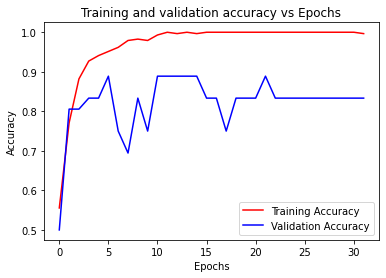

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


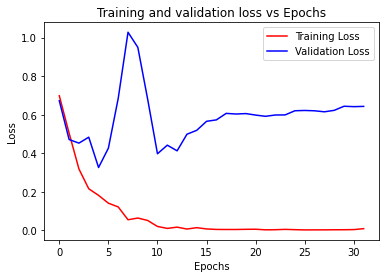

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy vs Epochs')
plt.legend()
accuracy_fig_name = "accuracy.eps"
plt.savefig(os.path.join(char, accuracy_fig_name))
plt.show()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss vs Epochs')
plt.legend()
loss_fig_name = "loss.eps"

plt.savefig(os.path.join(char, loss_fig_name))
plt.show()

In [19]:
training_accuracy = train_score[1]*100
validation_accuracy = val_score[1]*100
test_accuracy = test_score[1]*100

print("The training accuracy is: " + str(training_accuracy) + ' %')
print("The validation accuracy is: " + str(validation_accuracy) + ' %')
print("The test accuracy is: " + str(test_accuracy) + ' %')

The training accuracy is: 100.0 %
The validation accuracy is: 88.88888955116272 %
The test accuracy is: 97.22222089767456 %


In [20]:
test_accuracy = test_score[1]*100
test_precision = test_score[2]*100
test_recall = test_score[3]*100
tp = int(test_score[4])
tn = int(test_score[5])
fp = int(test_score[6])
fn = int(test_score[7])

f1 = 2*((test_precision*test_recall)/(test_precision+test_recall))
sensitivity = (tp/(tp+fn))*100
specificity = (tn/(tn+fp))*100

In [21]:
print("Test Accuracy: {}".format(test_accuracy))
print("Test Precision: {}".format(test_precision))
print("Test Recall: {}".format(test_recall))
print("True Positive: {}".format(tp))
print("Test Negetive: {}".format(tn))
print("False Positive: {}".format(fp))
print("False Negetive: {}".format(fn))
print("Sensitivity: {}".format(sensitivity))
print("Specificity: {}".format(specificity))

Test Accuracy: 97.22222089767456
Test Precision: 94.73684430122375
Test Recall: 100.0
True Positive: 18
Test Negetive: 17
False Positive: 1
False Negetive: 0
Sensitivity: 100.0
Specificity: 94.44444444444444


In [22]:
test_class_list = []
for test_name in os.listdir(TESTING_DIR):
    test = os.path.join(TESTING_DIR,test_name)
    test_class_list.append(test)
test_class_list.sort()

In [23]:
def max_pred(pred):
    pred_categorical = keras.utils.to_categorical(pred)
    if 1 > 2:
        pred_max = np.argmax(pred)
    else:
        pred_max = np.argmax(pred_categorical)
    return pred_max

In [24]:
y_true = test_generator.classes
labels = validation_generator.class_indices

In [25]:
labels

{'covid': 0, 'normal': 1}

In [26]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
test_class_list

['/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/classify train/testing/covid',
 '/home/rajarshi/Documents/DATASETS/Health/COVID/covid-chestxray-dataset-master/DATASET/classify train/testing/normal']

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred = []
for i in range(len(os.listdir(TRAINING_DIR))):
    for filename in os.listdir(test_class_list[i]):
        file = os.path.join(test_class_list[i], filename)
        img = image.load_img(file, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])

        pred = model.predict(images, batch_size = batch_size)
        pred_max = max_pred(pred)
        
        y_pred.append(pred_max)
 
print("Calculating CLASSIFICATION REPORT..........:")
classification_report = classification_report(y_true, y_pred, target_names=labels)
print(classification_report)

print("\nCalculating SENSITIVITY & SPECIFICITY..........:")
cm = confusion_matrix(y_true, y_pred)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("sensitivity = {:.4f}".format(sensitivity))
print("specificity = {:.4f}".format(specificity))

Calculating CLASSIFICATION REPORT..........:
              precision    recall  f1-score   support

       covid       1.00      0.94      0.97        18
      normal       0.95      1.00      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Calculating SENSITIVITY & SPECIFICITY..........:
sensitivity = 0.9444
specificity = 1.0000


In [29]:
from contextlib import redirect_stdout

readme_name_text = "readme.txt"
print("Please read the text file named " + readme_name_text + " for detailed information of the model.")

completeName_txt = os.path.join(char, readme_name_text) 

readme = open(completeName_txt, "w")

if len(os.listdir(TRAINING_DIR)) > 2:
    readme.write("This is a MULTICLASS CLASSIFICATION")
else:
    readme.write("This is a BINARY CLASSIFICATION")


readme.write("\n\n--HYPERPARAMETERS--\n")
readme.write(str(augmentation))
readme.write("\nInitial Learning Rate = " + str(learning_rate))
readme.write("\nNo. of epochs = " + str(len(acc)))
readme.write("\nBatch Size = " + str(batch_size))


readme.write("\n\n--MODEL-PARAMETERS--")
readme.write("\nActivation Function = relu")
readme.write("\nDropout = " + str(int(dropout*100)) + "%")
readme.write("\nActivation function of the output layer = " + str(output_activation))
readme.write("\nCost function of the model = " + str(losses))
readme.write("\nOptimizer = " + str(optimizer) + "\n\n")


readme.write("Trained on a Custom Prebuilt Model\n")
readme.write("Number of Conv layer = " + str(conv_layer))
readme.write("\nFilter size = " + str(conv_size)+ "*" + str(conv_size) + "\n\n")
with redirect_stdout(readme):
    model.summary()
        
    
readme.write("\n\n--MODEL-PERFORMANCE--")
readme.write("\nTest Accuracy = " + str(test_accuracy) + " %")
readme.write("\nTest Precision = " + str(test_precision) + " %")
readme.write("\nTest Recall = " + str(test_recall) + " %")
readme.write("\nTrue Positive = " + str(tp))
readme.write("\nTrue Negetive = " + str(tn))
readme.write("\nFalse Positive = " + str(fp))
readme.write("\nFalse Negetive = " + str(fn))
readme.write("\nSensitivity = " + str(sensitivity))
readme.write("\nSpecificity = " + str(specificity) + " \n\n\n")


readme.write("\n\n--MODEL-CHARACTERISTICS--")
readme.write("\nacc = " + str(acc))
readme.write("\n\nval_acc = " + str(val_acc))
readme.write("\n\nloss = " + str(loss))
readme.write("\n\nval_loss = " + str(val_loss))


readme.write("\n\n--Classification Report--\n")
readme.write(classification_report)

readme.write("\nSensitivity = " + str(int(sensitivity*100)) + " %")
readme.write("\nSpecificity = " + str(int(specificity*100)) + " %")


readme.write("\nExecution Time: {} seconds".format(duration))

readme.write("\n\nCreated using Self-Regulated Image Classifier using Convolution Neural Network")

readme.close()

Please read the text file named readme.txt for detailed information of the model.
